In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import broyden1

%matplotlib inline

In [2]:
def get_func(func, gamma, eps, alpha=None, beta=None): 
    def inner_func(N, t=0):
        return func(gamma, eps, alpha, beta, N, t)
    return inner_func 

In [3]:
def plot_population(func, x0, size=100):
    t = np.linspace(0, size,  10000)
    N, _ = odeint(func, x0, t, full_output=True)
    N_rabbits, N_foxes = zip(*N)
    
    plt.figure(figsize=(30, 10))
    plt.plot(t, N_rabbits, t, N_foxes)
    plt.legend(['Predator', 'Prey'])
    plt.title('Population')
    plt.show()

In [4]:
def plot_phase(func, s_points, nb_points=20):
    s_point = s_points[0]
    
    x_lim = (max(-0.5, np.min(s_points[:,0]) - 5), np.max(s_points[:,0]) + 5)
    y_lim = (max(-0.5, np.min(s_points[:,1]) - 5), np.max(s_points[:,1]) + 5)
    
    x, y = np.linspace(*x_lim, nb_points), np.linspace(*y_lim, nb_points)
    X, Y = np.meshgrid(x, y)
    
    dX, dY = func([X, Y], 0)
    M = (np.hypot(dX, dY))

    M[M == 0] = 1.
    dX /= M
    dY /= M
        
    values = np.linspace(1, 15, 5)
    vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))
    t = np.linspace(0, 50,  10000)
    
    plt.figure(figsize=(30, 10))
    plt.title('Phase portrait')
    for v, col in zip(values, vcolors):
        P0 = s_point * v
        P = odeint(func, P0, t)
        plt.plot(P[:,0], P[:,1], lw=0.1*v, color=col)

    plt.quiver(X, Y, dX, dY, M, pivot='mid', cmap=plt.cm.plasma)
    for p in s_points:
        plt.plot(*p, marker='o', markersize=7, color='g')

    plt.xlim(x_lim); plt.ylim(y_lim)
    plt.show()

## Part 1

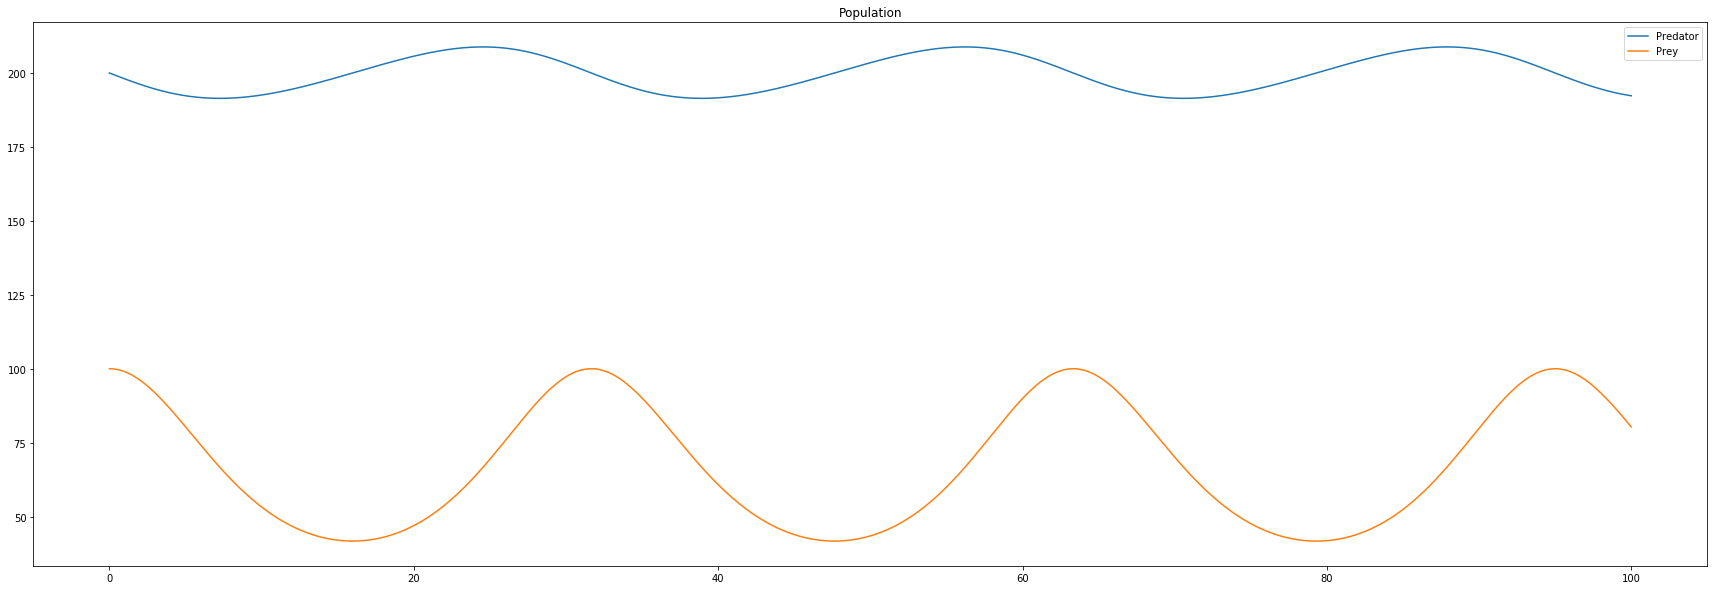

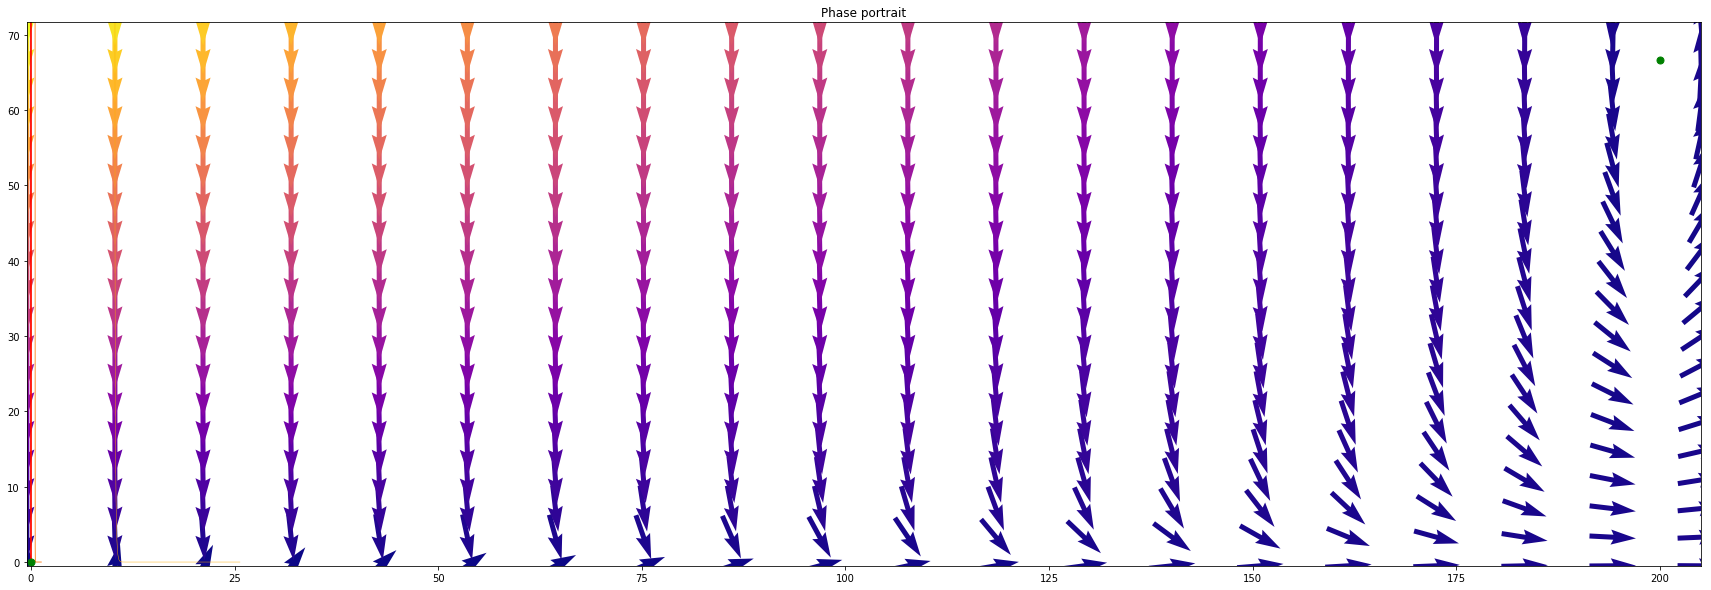

In [5]:
cfg = {
    'func': lambda gamma, eps, alpha, beta, N, t: [
        (eps[0] - gamma[0] * N[1]) * N[0],
        (-eps[1] + gamma[1] * N[0]) * N[1]
    ],
    'gamma': [0.0003, 0.01],
    'eps': [0.02, 2],
}
x0 = np.array([200, 100])

def get_s_points(gamma, eps, **kwargs):
    return np.array([
        (eps[1] / gamma[1], eps[0] / gamma[0]),
        (0, 0)
    ])

func = get_func(**cfg)
s_points = get_s_points(**cfg)

plot_population(func, x0)
plot_phase(func, s_points)

## Part 2

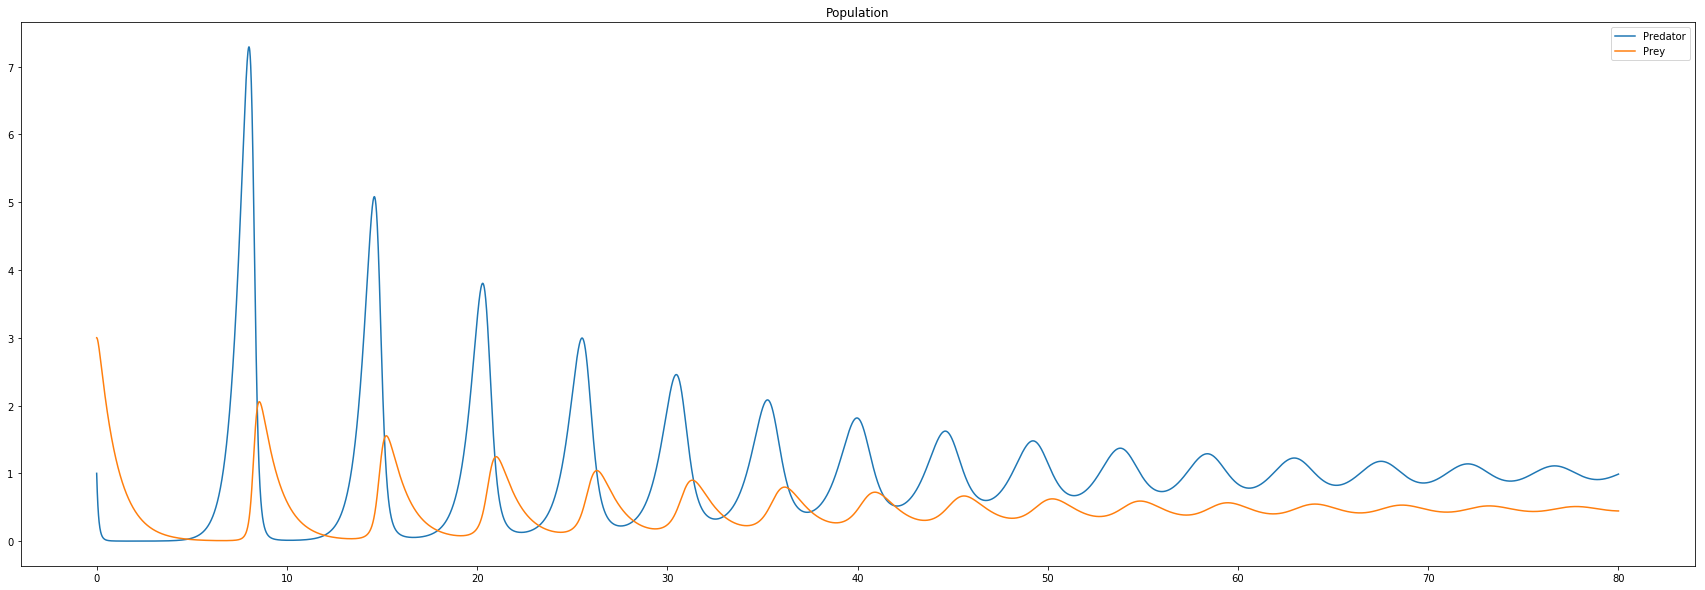

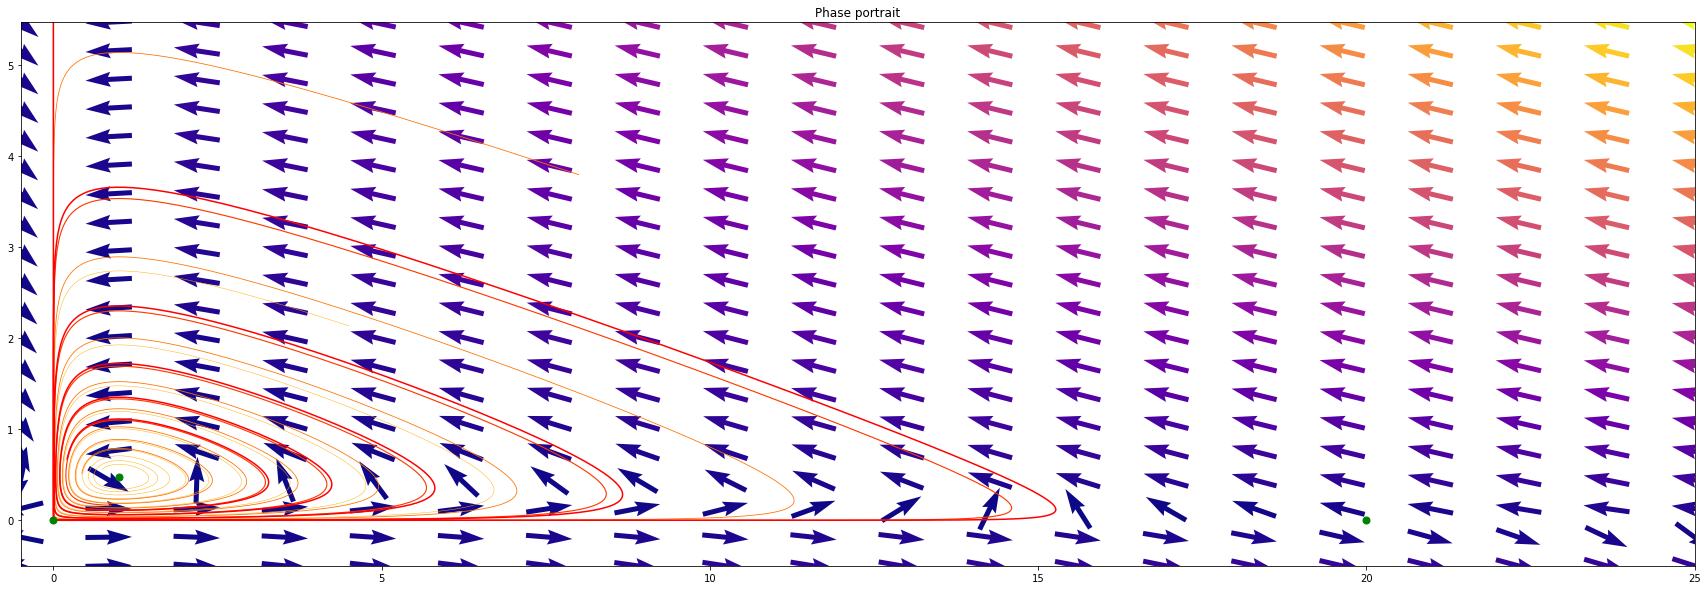

In [6]:
cfg = {
    'func': lambda gamma, eps, alpha, beta, N, t: (
        (eps[0] - gamma[0] * N[1] - alpha * N[0]) * N[0],
        N[1] * (gamma[1] * N[0] - eps[1])
    ),
    'gamma': [4, 1],
    'eps': [2, 1],
    'alpha': 0.1,
}
x0 = np.array([1, 3])

def get_s_points(gamma, eps, alpha, **kwargs):
    s_point = np.array([
        eps[1] / gamma[1], 
        (eps[0] * gamma[1] - alpha * eps[1]) / (gamma[0] * gamma[1]),
    ])
    return np.array([
        s_point,
        (0, 0),
        (eps[0] / alpha, 0), 
    ])

func = get_func(**cfg)
s_points = get_s_points(**cfg)

plot_population(func, x0, 80)
plot_phase(func, s_points)

## Part 3

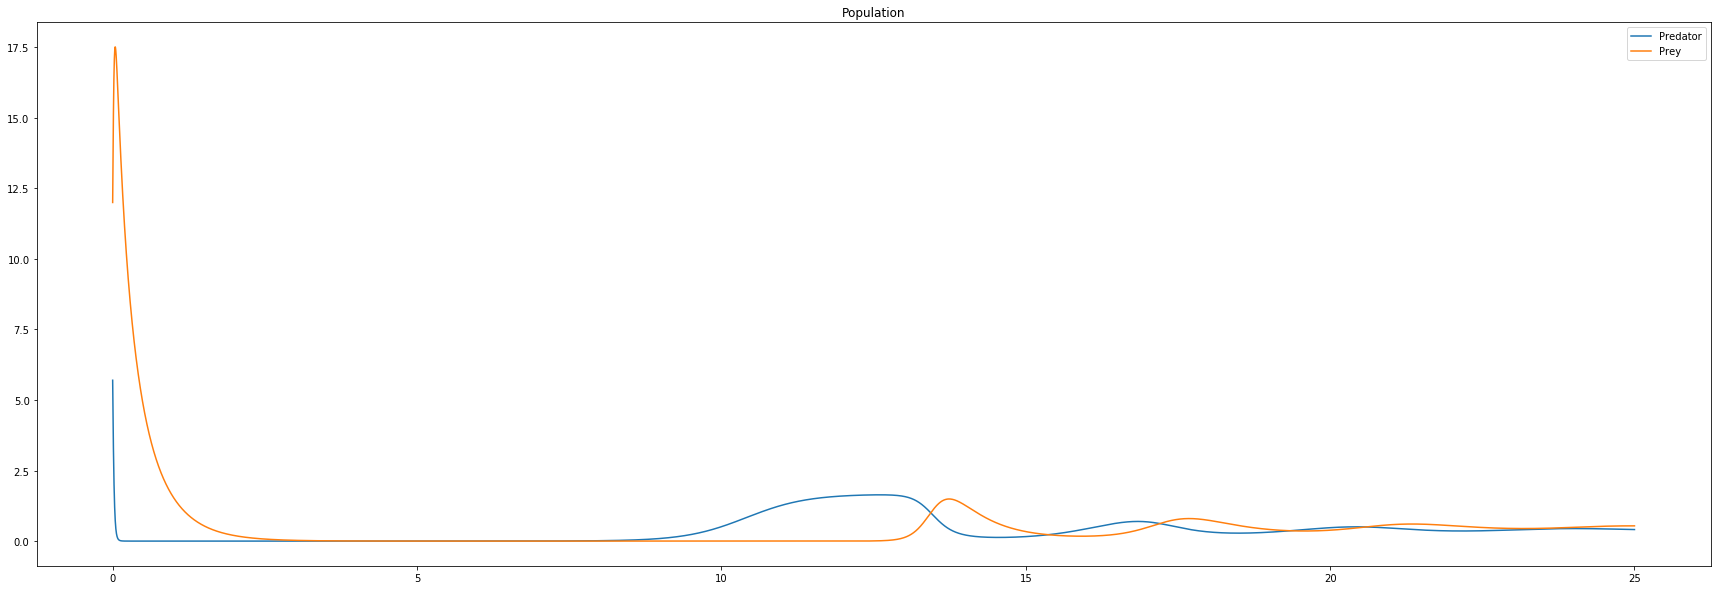

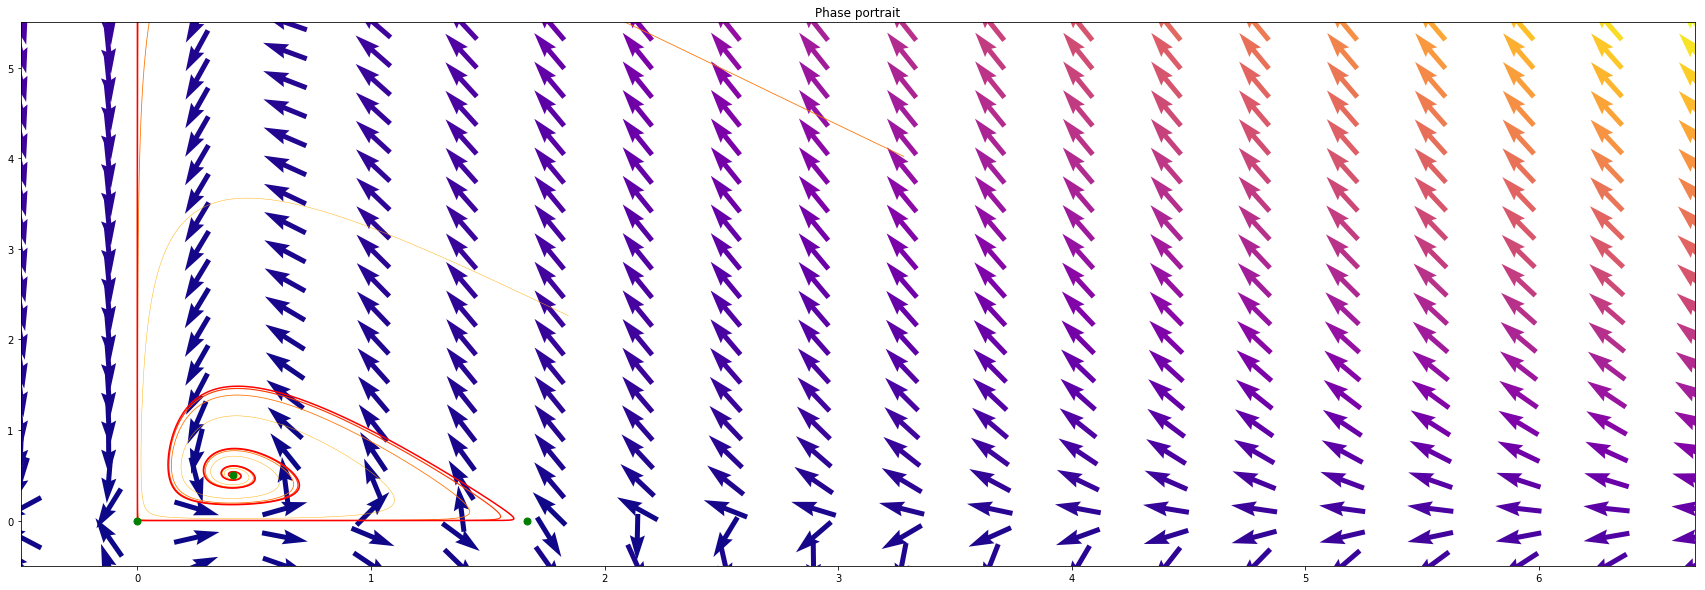

In [7]:
cfg = {
    'func': lambda gamma, eps, alpha, beta, N, t: (
        (eps[0] - gamma[0][0] * N[1] - gamma[0][1] * N[0]) * N[0],
        (-eps[1] + gamma[1][0] * N[0] - gamma[1][1] * N[1]) * N[1]
    ),
    'gamma': [[3, 1.2],
              [5, 0.1]],
    'eps': [2, 2],
}
x0 = np.array([5.7, 12])

def get_s_points(f, gamma, eps, **kwargs):
    s_point = broyden1(f, [1, 1], f_tol=1e-14)
    return np.array([
        s_point,
        (0, 0),
        (eps[0] / gamma[0][1], 0)
    ])

func = get_func(**cfg)
s_points = get_s_points(func, **cfg)

plot_population(func, x0, 25)
plot_phase(func, s_points)

## Part 4

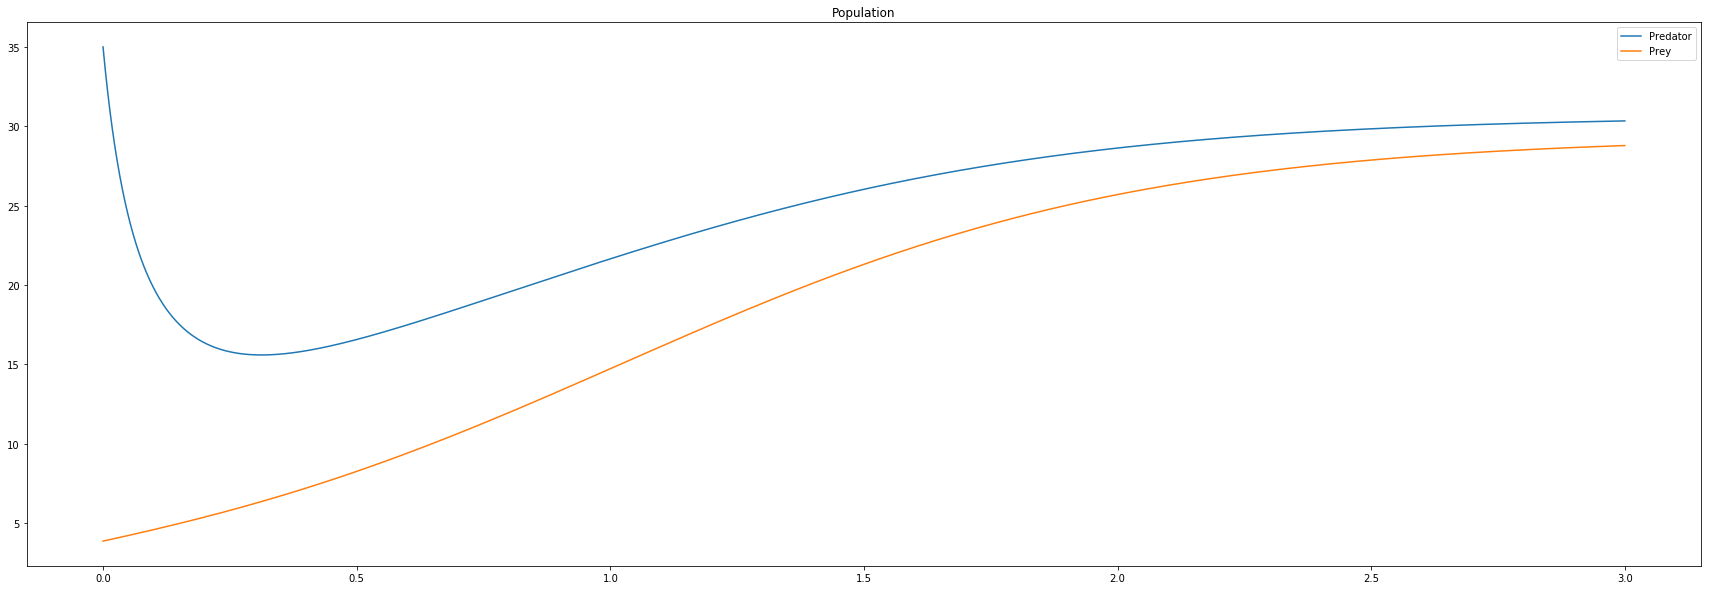

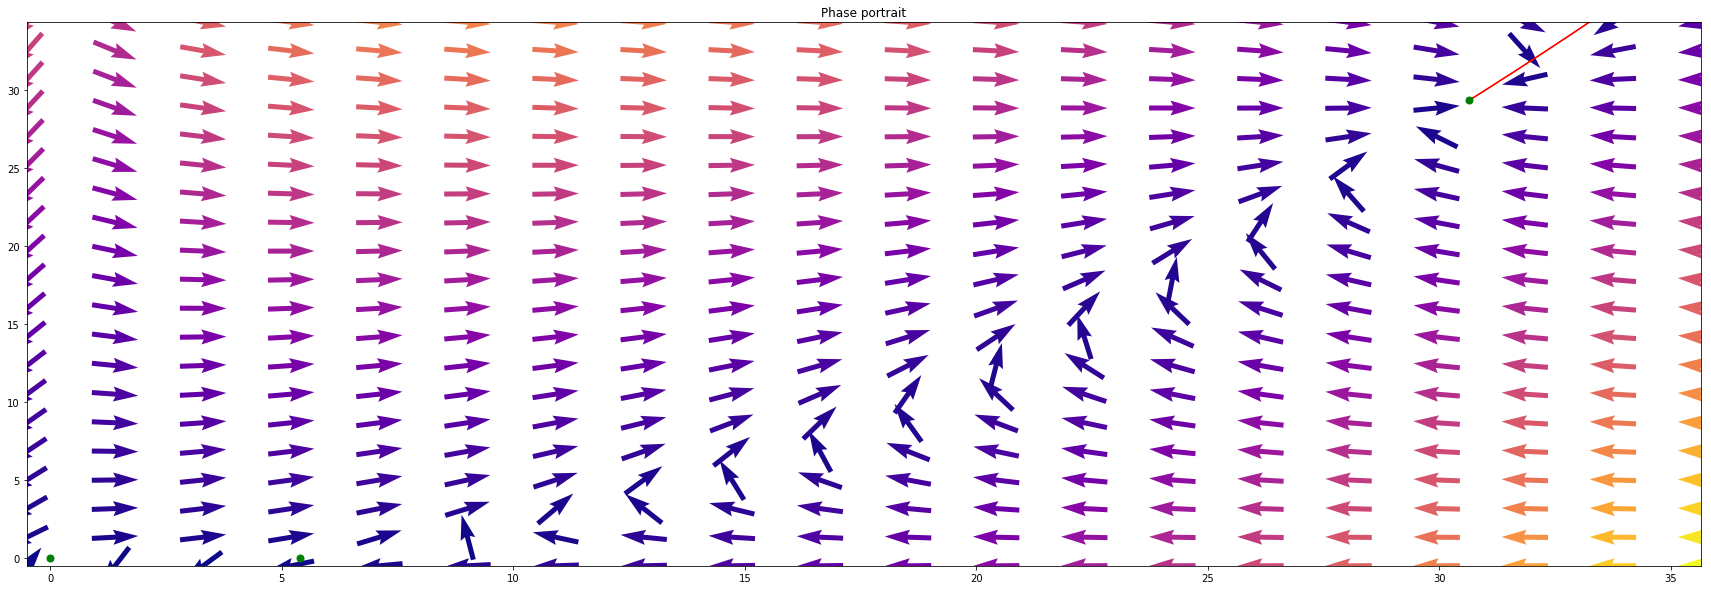

In [8]:
cfg = {
    'func': lambda gamma, eps, alpha, beta, N, t: (
         N[0] * (eps[0] - gamma[0] * N[0]) - (alpha[0] * N[0] * N[1]) / (1 + beta * N[0]),
        -N[1] * (eps[1] + gamma[1] * N[1]) + (alpha[1] * N[0] * N[1]) / (1 + beta * N[0])
    ),
    'gamma': [0.37, 0.07],
    'eps': [2, 1],
    'alpha': [-5.68, 1.78],
    'beta': 0.55,
}
x0 = np.array([35, 3.857])

def get_s_points(f, gamma, eps, alpha, **kwargs):
    s_point = broyden1(f, [10, 10])
    return np.array([
        s_point,
        (0, 0),
        (eps[0] / gamma[0], 0), 
    ])

func = get_func(**cfg)
s_points = get_s_points(func, **cfg)

plot_population(func, x0, 3)
plot_phase(func, s_points)